## IMPORTS

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### **Check if torch is installed**

In [2]:
!pip show torch

Name: torch
Version: 2.6.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: E:\Program Files\anaconda\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, setuptools, sympy, typing-extensions
Required-by: torchaudio, torchvision


In [3]:
print(torch.__version__)
print(torch.cuda.is_available())


2.6.0+cpu
False


### **The nvidia-smi command-line utility (NVIDIA System Management Interface):**
is designed to manage and monitor NVIDIA GPU devices.
When you execute !nvidia-smi within a Jupyter notebook, it provides real-time information about your GPU's status.

In [4]:
!nvidia-smi 

Sat Mar 15 23:22:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 556.12                 Driver Version: 556.12         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   53C    P8             13W /   45W |     181MiB /   6144MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Checking if CUDA is installed properly

In [5]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Tue_Feb_27_16:28:36_Pacific_Standard_Time_2024
Cuda compilation tools, release 12.4, V12.4.99
Build cuda_12.4.r12.4/compiler.33961263_0


## Intro to tensors


- [link to tensors documentation](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html)
- [link to tensor part in book](https://www.learnpytorch.io/00_pytorch_fundamentals/#creating-tensors)

### creating a tensor

In [6]:
# Scalar
scalar = torch.tensor(7)
print (scalar)
print(scalar.item()) # gets item in tensor as int
print(scalar.ndim) # returns dimension


tensor(7)
7
0


In [7]:
# Vector (magnitude and direction)
vector = torch.tensor([3, 7])
print (vector)
print(vector.ndim) # dimension is number of pairs of bracets
print(vector.shape) # number of elements

tensor([3, 7])
1
torch.Size([2])


In [8]:
# Matrix

MATRIX = torch.tensor([[7, 8], 
                       [9, 10]])

print (MATRIX)
print (MATRIX[0])
print (MATRIX[1])
print(MATRIX.ndim) # dimension is number of pairs of bracets
print(MATRIX.shape) # number of elements

tensor([[ 7,  8],
        [ 9, 10]])
tensor([7, 8])
tensor([ 9, 10])
2
torch.Size([2, 2])


In [9]:
# Tensor

TENSOR = torch.tensor([[[1,2,3],
                        [3,6,8],
                        [4,5,7]]])

print (TENSOR)
print (TENSOR[0][0])
print (TENSOR[0][1])
print (TENSOR[0][2])
print(TENSOR.ndim) # dimension is number of pairs of bracets
print(TENSOR.shape) # number of elements

tensor([[[1, 2, 3],
         [3, 6, 8],
         [4, 5, 7]]])
tensor([1, 2, 3])
tensor([3, 6, 8])
tensor([4, 5, 7])
3
torch.Size([1, 3, 3])


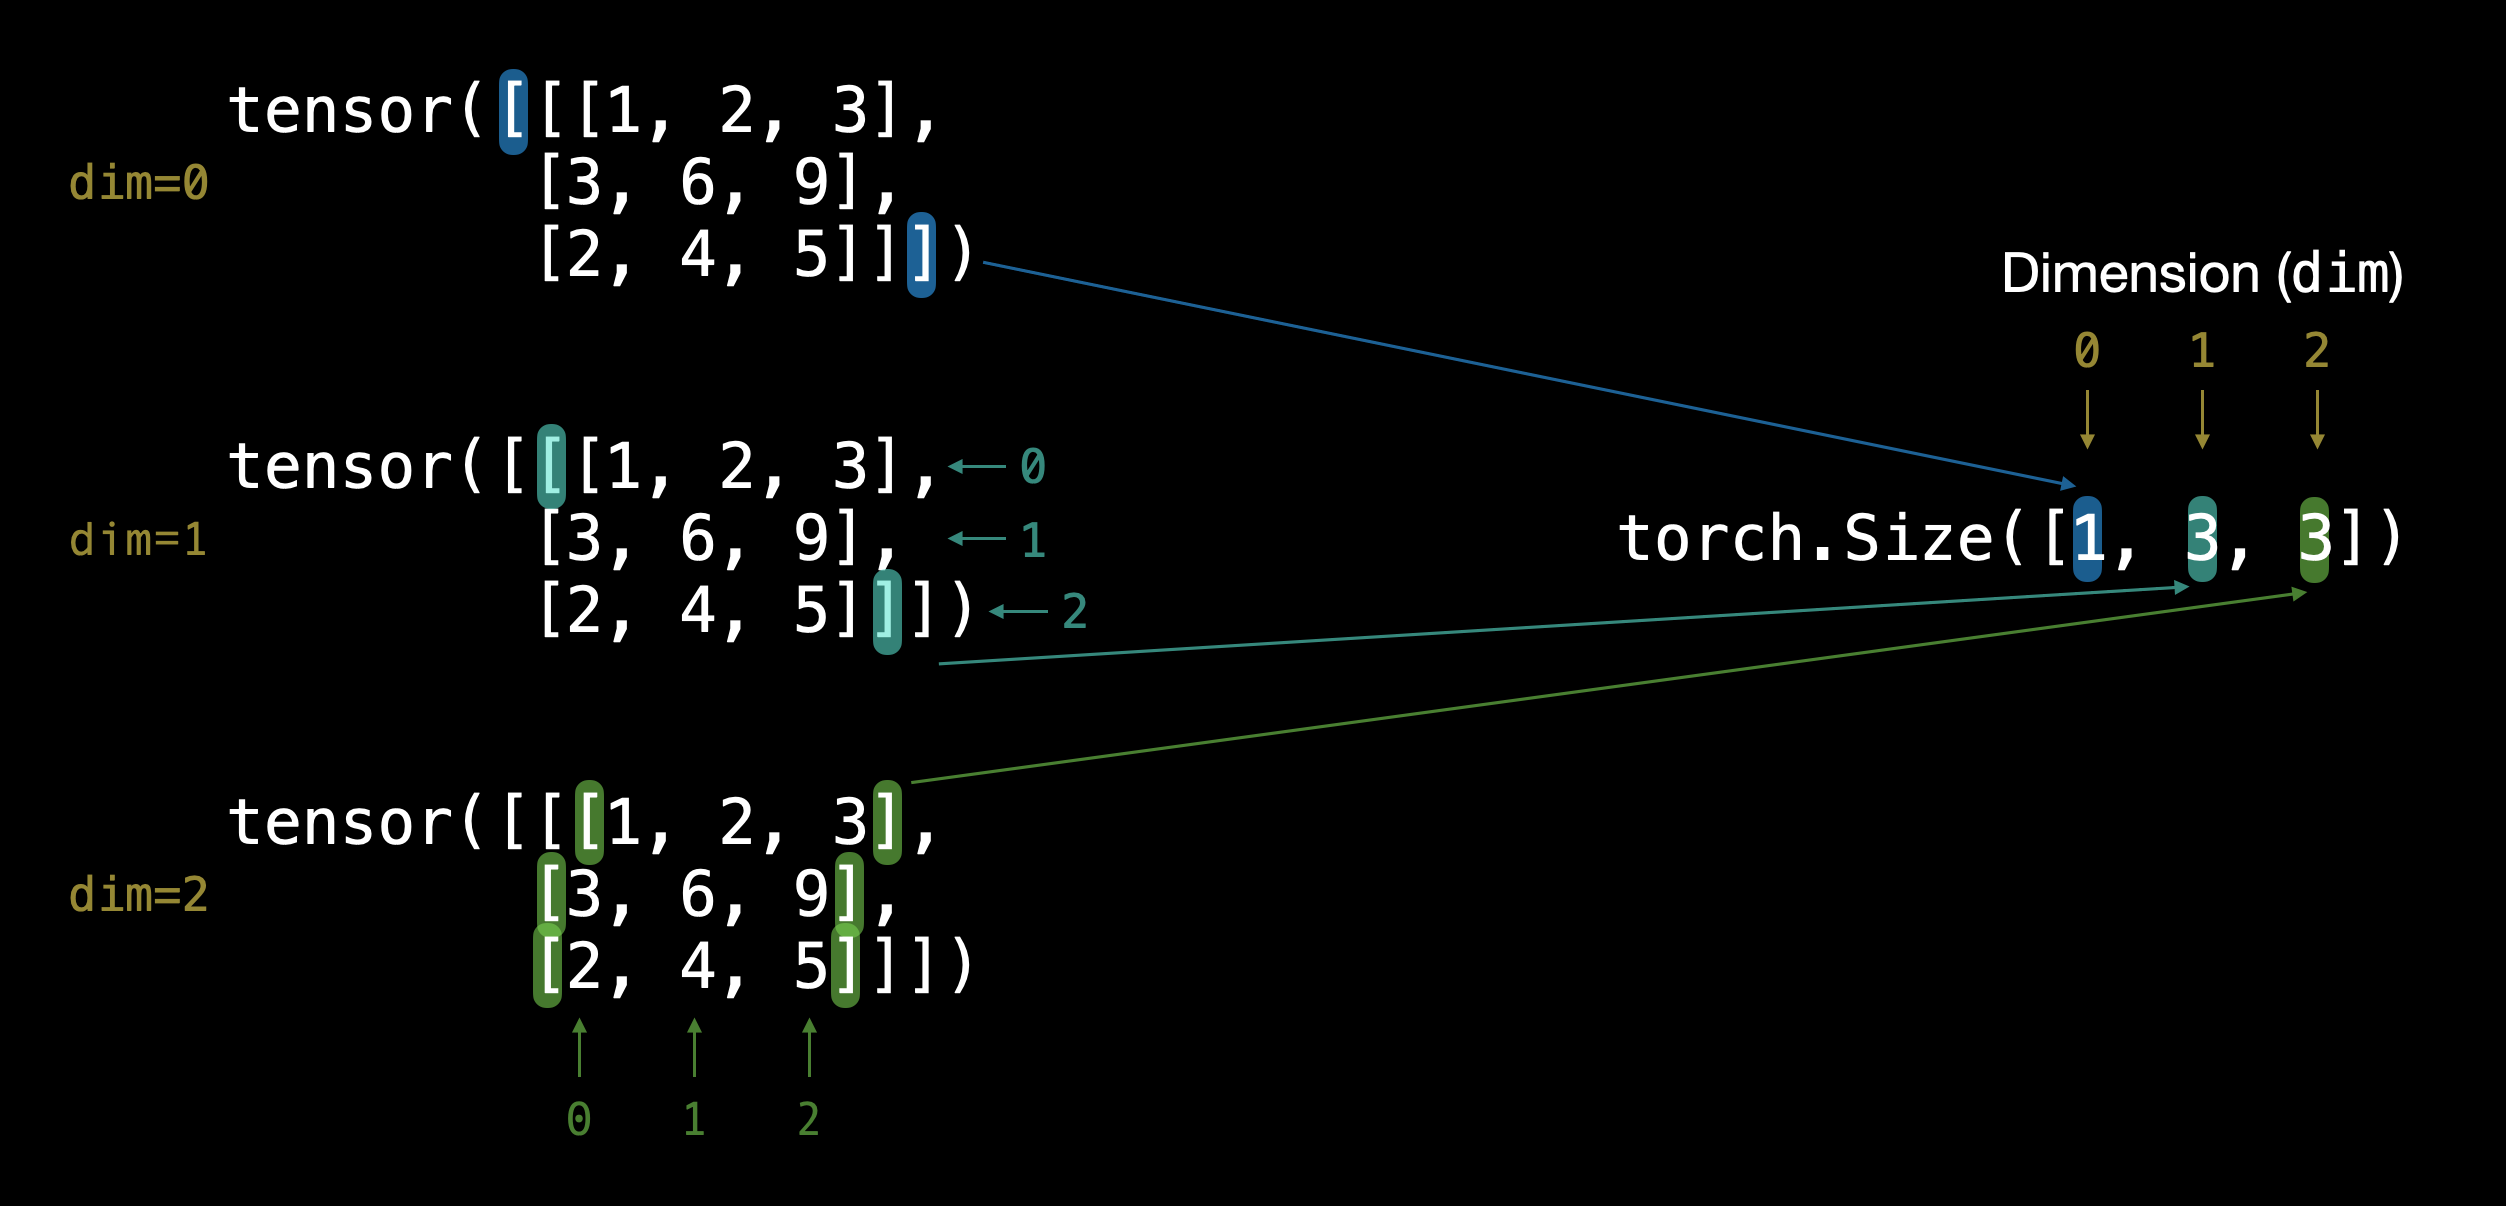

## Random tensors

the way NN works is that they look at random data -> adjust (update) this data -> look at random data -> adjust -> and so on....

In [10]:
# creating a random tensor of size (3, 4)
rand_tensor = torch.rand(3, 4)
rand_tensor

tensor([[0.8584, 0.2546, 0.9840, 0.4802],
        [0.3416, 0.8386, 0.1278, 0.3193],
        [0.9629, 0.8482, 0.1111, 0.7672]])

In [11]:
rand_tensor.ndim

2

In [12]:
# creating a rand tensor with similar shape to an img (colors, height, width)
rand_img_tensor  = torch.rand(size=(3, 224, 224)) # (size= is the default you dont have to write it)
rand_img_tensor.shape, rand_img_tensor.ndim


(torch.Size([3, 224, 224]), 3)

## Zeros and Ones (masking)

In [13]:
zeros = torch.zeros(3, 4)
ones = torch.ones(3,4)

print(zeros)
print(ones)

print(zeros.dtype)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
torch.float32


## creating a range of tensors and tensor-like

In [3]:
import torch
one_to_ten = torch.arange(start= 1, end=11, step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
# Creating tensor like (like the shape)

ten_zeros = torch.zeros_like(input= one_to_ten)
ten_ones = torch.ones_like(input=one_to_ten)
print(ten_zeros)
ten_ones

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Tensors datatypes

three of the most common attributes you'll want to find out about tensors are:

- shape - what shape is the tensor? (some operations require specific shape rules)
- dtype - what datatype are the elements within the tensor stored in?
- device - what device is the tensor stored on? (usually GPU or CPU)

In [16]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # what device the tensor is on (eg. "cpu", "cuda")
                               requires_grad=False) # whether or not to track gradients with this tensor's operations

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

In [17]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

In [18]:
ans = float_16_tensor * float_32_tensor
print(ans)
print(ans.dtype)

tensor([ 9., 36., 81.])
torch.float32


In [19]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.6021, 0.4383, 0.8602, 0.1911],
        [0.3892, 0.3900, 0.0174, 0.9140],
        [0.3595, 0.6673, 0.4088, 0.6189]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Manipulating tensors (tensor operations)

In [20]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [21]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

In [22]:
# Subtract
tensor - 10

tensor([-9, -8, -7])

### matrix mult
- element wise
- dot product

check this website: http://matrixmultiplication.xyz/

In [ ]:
# element wise
print (tensor * tensor) # tensor([1, 2, 3])

# mat mult (for 1D like dot product)
print(torch.matmul(tensor, tensor)) # [1*1 + 2*2 + 3*3] = [14]

tensor([1, 4, 9])
tensor(14)


In [24]:
# Can also use the "@" symbol for matrix multiplication, though not recommended
tensor @ tensor

tensor(14)

In [25]:
%%time
# Matrix multiplication by hand 
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: total: 0 ns
Wall time: 1 ms


tensor(14)

In [26]:
%%time
torch.matmul(tensor, tensor)

CPU times: total: 0 ns
Wall time: 0 ns


tensor(14)

In [27]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

In [28]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7.,  8.,  9.],
         [10., 11., 12.]]),
 torch.Size([2, 3]))

In [29]:
torch.matmul(tensor_A, tensor_B.T).shape

torch.Size([3, 3])

## Finding the min, max, mean, sum, etc (aggregation)

In [30]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will give error beacuse type of tensor is wrong
print (f"x datatype: {x.dtype}")
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
x datatype: torch.int64
Mean: 45.0
Sum: 450


In [32]:
# these also do the same function
torch.min(x), torch.max(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(0), tensor(90), tensor(45.), tensor(450))

### Positional min/max

In [33]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


## Reshaping, stacking, squeezing and unsqueezing

a table of all the functions and their args: https://www.learnpytorch.io/00_pytorch_fundamentals/#reshaping-stacking-squeezing-and-unsqueezing

In [34]:
# Create a tensor
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [35]:
# Add an extra dimension
x_reshaped = x.reshape(1, 7) # with reshape the new shape must be compatible with the numbers of the shape of the original
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [36]:
# Change view (keeps same data as original but changes view)
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

- **reshape** -> returns a copy
- **view** -> changes the actuall tensor (acts like a pointer)

In [ ]:
# Changing z (view of x) changes x (the original)
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

In [38]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0) # dim = 0 -> vertical stack
print(x_stacked)

x_stacked = torch.stack([x, x, x, x], dim=1) # dim = 1 -> horizontal stack
print(x_stacked)

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])
tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.]])


In [39]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped (removes any '1' dimension)
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


In [ ]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze (adds a '1' dimension in the place)
x_unsqueezed = x_squeezed.unsqueeze(dim=0) # dim indicates the place of the new '1' dimension in here the one will be at dim 0
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape at dim=0: {x_unsqueezed.shape}")

x_unsqueezed = x_squeezed.unsqueeze(dim=1) # dim indicates the place of the new '1' dimension in here the one will be at dim 1
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape at dim=1: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape at dim=0: torch.Size([1, 7])

New tensor: tensor([[5.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.]])
New shape at dim=1: torch.Size([7, 1])


In [41]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


### Indexing is the same as numpy

In [42]:
# Create a tensor 
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [43]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}") 
print(f"Second square bracket: {x[0][0]}") 
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


You can also use `:` to specify "all values in this dimension" and then use a comma `(,)` to add another dimension.

In [45]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [46]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [47]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [48]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension 
x[0, 0, :] # same as x[0][0]

tensor([1, 2, 3])

## pytorch to numpy

The two main methods you'll want to use for NumPy to PyTorch (and back again) are:
- `torch.from_numpy(ndarray)` - NumPy array -> PyTorch tensor.
- `torch.Tensor.numpy()` - PyTorch tensor -> NumPy array.

In [ ]:
# NumPy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array) # Waring when converting from numpy-> pytorch it is by default float64
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

So if you want to convert your `NumPy array (float64) -> PyTorch tensor (float64) -> PyTorch tensor (float32)`, you can use 
```python
tensor = torch.from_numpy(array).type(torch.float32).
```

In [51]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Randomness

To reduce randomness in NN and pytorch comes the concept of a **random seed**

In [52]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.8338, 0.8667, 0.4633, 0.6305],
        [0.2225, 0.6661, 0.8868, 0.3261],
        [0.0745, 0.8415, 0.7188, 0.4181]])

Tensor B:
tensor([[0.5902, 0.2320, 0.8349, 0.5961],
        [0.8515, 0.0024, 0.8461, 0.5129],
        [0.1815, 0.9739, 0.5778, 0.8920]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [58]:
import torch
import random

# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED) 
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called 
# Without this, tensor_D would be different to tensor_C 
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

[The PyTorch reproducibility documentation](https://pytorch.org/docs/stable/notes/randomness.html)